In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
# Import the needed libraries

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

####Διάβασμα των δεδομένων από τα αντίστοιχα csv αρχεία και αποθήκευση αυτών σε pandas DataFrames

In [38]:
# Read data and create dataframes

path = './drive/MyDrive/'

location = path + 'netflix_titles.csv'
dtypes = {
    'show_id': 'object',
    'type': 'object',
    'title': 'object',
    'director': 'object',
    'cast': 'object',
    'country': 'object',
    'date_added': 'object',
    'release_year': 'int64',
    'rating': 'object',
    'duration': 'object',
    'listed_in': 'object',
    'description': 'object'
}
titles_df = pd.read_csv(location, dtype=dtypes, parse_dates=['date_added'])

location = path + 'IMDb movies.csv'
dtypes = {
    'imdb_title_id': 'object',
    'title': 'object',
    'original_title': 'object',
    'year': 'object',
    'date_published': 'object',
    'genre': 'object',
    'duration': 'int64',
    'country': 'object',
    'language': 'object',
    'director': 'object',
    'writer': 'object',
    'production_company': 'object',
    'actors': 'object',
    'description': 'object',
    'avg_vote': 'float64',
    'votes': 'int64',
    'budget': 'object',
    'usa_gross_income': 'object',
    'worlwirde_gross_income': 'object',
    'metascore': 'float64',
    'reviews_from_users': 'float64',
    'reviews_from_critics': 'float64'
}
movies_df = pd.read_csv(location, dtype=dtypes)

location = path + 'IMDb ratings.csv'
dtypes = {
    'imdb_title_id': 'object',
    'weighted_average_vote': 'float64',
    'total_votes': 'int64',
    'mean_vote': 'float64',
    'median_vote': 'float64',
    'votes_10': 'int64',
    'votes_9': 'int64',
    'votes_8': 'int64',
    'votes_7': 'int64',
    'votes_6': 'int64',
    'votes_5': 'int64',
    'votes_4': 'int64',
    'votes_3': 'int64',
    'votes_2': 'int64',
    'votes_1': 'int64',
    'allgenders_0age_avg_vote': 'float64',
    'allgenders_0age_votes': 'float64',
    'allgenders_18age_avg_vote': 'float64',
    'allgenders_18age_votes': 'float64',
    'allgenders_30age_avg_vote': 'float64',
    'allgenders_30age_votes': 'float64',
    'allgenders_45age_avg_vote': 'float64',
    'allgenders_45age_votes': 'float64',
    'males_allages_avg_vote': 'float64',
    'males_allages_votes': 'float64',
    'males_0age_avg_vote': 'float64',
    'males_0age_votes': 'float64',
    'males_18age_avg_vote': 'float64',
    'males_18age_votes': 'float64',
    'males_30age_avg_vote': 'float64',
    'males_30age_votes': 'float64',
    'males_45age_avg_vote': 'float64',
    'males_45age_votes': 'float64',
    'females_allages_avg_vote': 'float64',
    'females_allages_votes': 'float64',
    'females_0age_avg_vote': 'float64',
    'females_0age_votes': 'float64',
    'females_18age_avg_vote': 'float64',
    'females_18age_votes': 'float64',
    'females_30age_avg_vote': 'float64',
    'females_30age_votes': 'float64',
    'females_45age_avg_vote': 'float64',
    'females_45age_votes': 'float64',
    'top1000_voters_rating': 'float64',
    'top1000_voters_votes': 'float64',
    'non_us_voters_rating': 'float64',
    'non_us_voters_votes': 'float64'
}
ratings_df = pd.read_csv(location, dtype=dtypes)

# titles_df.info()
# movies_df.info()
# ratings_df.info()

####Missing Data - θα χρησιμοποιήσουμε δύο συναρτήσεις:
1. Για τον έλεγχο κενών δεδομένων σε κάποια στήλη ή στήλες ενός dataframe
2. Για τη διαγραφή των γραμμών ενός dataframe που έχουν κενά πεδία σε ορισμένη στήλη ή στήλες

In [39]:
# Check for any missing data in a dataframe

# Check for missing data only in 'columns' of 'df' dataframe
def missingData(columns, df):
  res = df[columns].isnull().sum().sort_values(ascending=True)

  # If there is no missing data, return an empty pandas.Series
  if res.values.sum() == 0:
    return pd.Series(dtype='object')
  else:
    return res

# Delete all rows from a dataframe with empty values in 'columns'
def deleteMissingData(columns, df):
  temp_df = df.copy()

  for column in columns:
    # Delete rows with empty value in 'column'
    temp_df.dropna(subset=[column], axis=0, inplace=True)

  return temp_df

####Η παρακάτω συνάρτηση χρησιμοποιείται για την απάντηση των ερωτημάτων που ακολουθούν.
Είσοδος: ένα σύνολο πεδίων μιας στήλης του dataframe που είναι ομαδοποιημένα βάσει των τιμών μιας άλλης στήλης
Έξοδος: ένα python dictionary με keys τις τιμές της στήλης με τις οποίες έγινε η ομαδοποίηση των δεδομένων και values τα ίδια τα δεδομέένα

In [40]:
# Get a list of (<str>, <pandas.Series>) tuples
# Where <pandas.Series> is the dataframe's columns groupped by a specific column (<str>)
# Analyse the given data to a dictionary and return it
def analyse_groupped_data(groupped, split_data=False, split_key=False, num_values=False, sort_values=False, key_filter=None, data_filter=None):

  # Will return a dictionary of the given data
  # The str will be used as the dictionary's key
  # The pandas.Series will be used as the dictionary's values
  analysed = dict()

  # For each (key, values) tuple
  for (key, series) in groupped:
    # If the key is a string of multiple sub-keys, we split them to add each sub-key seperately
    if split_key == True:
      key = key.split(', ')
    else:
      key = [key]

    # If each value in pandas.Series is a string of many sub-values, we split them to add each sub-value seperately
    if split_data == True:
      # All values
      tmp_data = series.values
      data = []
      # For each value (string of many sub-values)
      for item in tmp_data:
        data = data + item.split(', ')
      # Use set() to remove duplicate values
      data = list(set(data))
    else:
      data = series.to_list()
  
    # If the user asked to filter the dictionary's values
    if data_filter is not None:
      # Keep a copy, since 'data' will be edited inside the for loop
      original_data = data.copy()
      # For each data value
      for value in original_data:
        # If the current value is not in the allowed values
        if value not in data_filter:
          data.remove(value)

    # If the user asked for the values to be the number of the data and not the data itself
    if num_values == True:
      data = len(data)

    # For each sub-key
    for sub_key in key:
      # If the user asked to filter the dictionary's keys
      if key_filter is not None:
        # If the current sub-key is not in the allowed keys
        if sub_key not in key_filter:
          continue

      # If the current sub-key is not in the dictionary so far
      if sub_key not in analysed.keys():
        analysed[sub_key] = data
        # If the user asked for the values to be sorted
        if sort_values == True:
          analysed[sub_key].sort()
      else:
        analysed[sub_key] = analysed[sub_key] + data
        # Only if the user did not ask for the values to be the number of the data, but the data itself
        if num_values == False:
          # Use set() to remove duplicate values
          analysed[sub_key] = list(set(analysed[sub_key]))
        # If the user asked for the values to be sorted
        if sort_values == True:
          analysed[sub_key].sort()

  return analysed


---
#Ερωτήματα

###1. Ποιό είδος υπερτερεί, οι ταινίες ή οι σειρές;

#####Συγκρίνουμε τον αριθμό όλων των ταινιών του netflix με τον αριθμό όλων των σειρών.

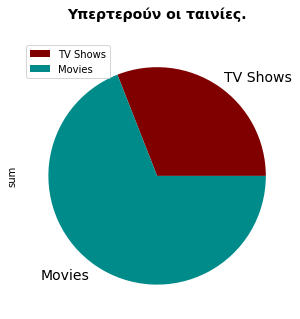

In [41]:
# Check for missing data in 'type' column
res = missingData(['type'], titles_df)

# If there is missing data
if res.empty == False:
  tmp_titles_df = deleteMissingData(['type'], titles_df)
else:
  tmp_titles_df = titles_df

# Get the number of ids of netflix titles that correspond to a tv show
tv_shows = len(tmp_titles_df['show_id'][tmp_titles_df['type']=='TV Show'])
# Get the number of ids of netflix titles that correspond to a movie
movies = len(tmp_titles_df['show_id'][tmp_titles_df['type']=='Movie'])

# Print answer
if tv_shows > movies:
  title = 'Υπερτερούν οι σειρές.\n'
elif movies > tv_shows:
  title = 'Υπερτερούν οι ταινίες.\n'
else:
  title = 'Υπάρχουν τόσες ταινίες όσες και σειρές.\n'

# Print plot pie
df = pd.DataFrame(data={'sum':[tv_shows,movies]},index=['TV Shows','Movies'])
df.plot.pie(y='sum', figsize=(5,5), fontsize=14, colors=['maroon','darkcyan'])
plt.title(title, fontsize=14, fontweight='bold')
plt.show()

###2. Τα τελευταία χρόνια το netflix επενδύει περισσότερο σε ταινίες ή σε σειρές; 

#####Συγκρίνουμε των αριθμό των ταινιών του netflix που προστέθηκαν ανά έτος σε σχέση με τον αντίστοιχο αριθμό σειρών.
(Στο γράφημα παρουσιάζονται όλα τα έτη που βρέθηκαν στα δεδομένα, καθώς δεν προκύπτει κάποιο οπτικό πρόβλημα με την αναπαράστασή τους)

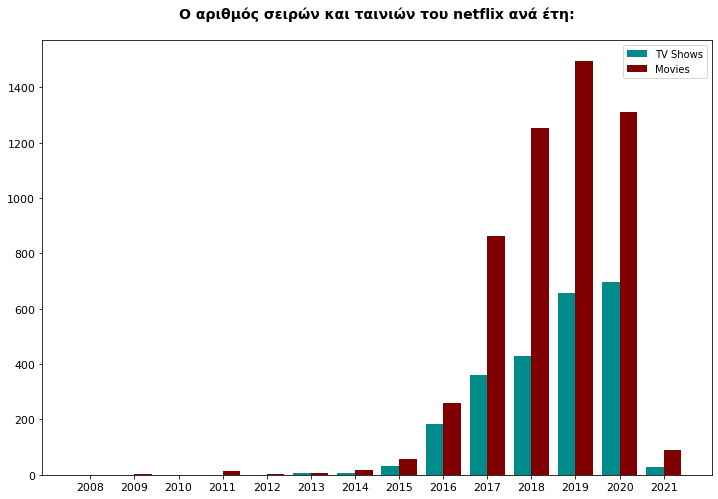

In [42]:
# Check for missing data in the columns of interest
res = missingData(['type','date_added'], titles_df)

# If there is missing data
if res.empty == False:
  temp_titles_df = deleteMissingData(['type','date_added'], titles_df)
else:
  temp_titles_df = titles_df

# Get a list of all types in titles_df groupped by the year they were added to netflix
groupped = list(temp_titles_df.groupby(temp_titles_df.date_added.dt.year)['type'])

# Get a dictionary of the number of tv shows in titles_df per year
tvshows_per_year = analyse_groupped_data(groupped, num_values=True, data_filter=['TV Show'])
# Get a dictionary of the number of movies in titles_df per year
movies_per_year = analyse_groupped_data(groupped, num_values=True, data_filter=['Movie'])

# Plot results
fig, ax = plt.subplots(figsize=(12,8))
bar_width = 0.4
x = np.asarray(range(1,len(groupped)+1))

b1 = ax.bar(x, list(tvshows_per_year.values()), width=bar_width, label='TV Shows', color='darkcyan')
    
b2 = ax.bar(x + bar_width, list(movies_per_year.values()), width=bar_width, label='Movies', color='maroon')

ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels([int(i) for i in list(tvshows_per_year.keys())])
ax.legend()
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.title('Ο αριθμός σειρών και ταινιών του netflix ανά έτη:\n', fontsize=14, fontweight='bold')
plt.show()

###3. Ποιά χώρα έχει το περισσότερο περιεχόμενο;

#####Για κάθε χώρα στα δεδομένα του netflix συγκρίνεται ο αριθμός ταινιών και σειρών οι οποίες έχουν παραχθεί (και) στη χώρα αυτή.

In [43]:
# Check for missing data in the columns of interest
res = missingData(['country'], titles_df)

# If there is missing data
if res.empty == False:
  temp_titles_df = deleteMissingData(['country'], titles_df)
else:
  temp_titles_df = titles_df

# Get a list of all show_ids groupped by the country they were produced in
groupped = list(temp_titles_df.groupby(temp_titles_df['country'])['show_id'])

# Get a dictionary with the number of movies/tv shows for each country
per_country = analyse_groupped_data(groupped, split_key=True, num_values=True)

# Get the country with the greatest content
maxCountry = max(per_country, key=per_country.get)
print('Η χώρα με το περισσότερο περιεχόμενο είναι η εξής: ', maxCountry)

Η χώρα με το περισσότερο περιεχόμενο είναι η εξής:  United States


###4. Τι είδους περιεχόμενο έχει κάθε χώρα;

#####Για κάθε χώρα στα δεδομένα του netflix παρουσιάζονται με αλφαβητική σειρά τα είδη ταινιών και σειρών που έχουν παραχθεί σε αυτή.

In [44]:
# Check for missing data in the columns of interest
res = missingData(['country'], titles_df)

# If there is missing data
if res.empty == False:
  temp_titles_df = deleteMissingData(['country'], titles_df)
else:
  temp_titles_df = titles_df

# Get a list of all genres groupped by the country they were produced in
groupped = list(temp_titles_df.groupby(temp_titles_df['country'])['listed_in'])

# Get a dictionary with the genres of movies/tv shows for each country
per_country = analyse_groupped_data(groupped, split_data=True, split_key=True, sort_values=True)

# Print results
print('\033[1m' + 'Τα είδη ταινιών ή σειρών ανά χώρα στο netflix:' + '\033[0m')

# Will print countries in ascending order
countries = list(per_country.keys())
countries.sort()

for country in countries:
  print('\n {} ({}):\n'.format(country, len(per_country[country])))
  for genre in per_country[country]:
    print('\t{}\n'.format(genre))


Τα είδη ταινιών ή σειρών ανά χώρα στο netflix:

 Afghanistan (2):

	Documentaries

	International Movies


 Albania (2):

	Dramas

	International Movies


 Algeria (3):

	Classic Movies

	Dramas

	International Movies


 Angola (2):

	Action & Adventure

	International Movies


 Argentina (29):

	Action & Adventure

	Children & Family Movies

	Classic Movies

	Comedies

	Crime TV Shows

	Cult Movies

	Documentaries

	Docuseries

	Dramas

	Horror Movies

	Independent Movies

	International Movies

	International TV Shows

	Kids' TV

	LGBTQ Movies

	Movies

	Music & Musicals

	Reality TV

	Romantic Movies

	Romantic TV Shows

	Sci-Fi & Fantasy

	Spanish-Language TV Shows

	Sports Movies

	Stand-Up Comedy

	TV Comedies

	TV Dramas

	TV Horror

	Teen TV Shows

	Thrillers


 Armenia (2):

	Documentaries

	International Movies


 Australia (34):

	Action & Adventure

	British TV Shows

	Children & Family Movies

	Classic Movies

	Comedies

	Crime TV Shows

	Cult Movies

	Documentaries

	Docu

###5. Ετοιμάστε γραφήματα που δειχνουν τους ηθοποιούς με τις περισσότερες ταινίες σε κάθε χώρα. Κάντε το ίδιο και για τις σειρές.

#####Εξ' ορισμού παρουσιάζονται οι 10 ηθοποιοί με τις περισσότερες ταινίες και οι  10 ηθοποιοί με τις περισσότερες σειρές στην Αμερική.

Ο χρήστης έχει τη δυνατότητα να δει τα αποτελέσματα και για περισσότερους ή λιγότερους ηθοποιούς, για οποιαδήποτε χώρα της επιλογής του.

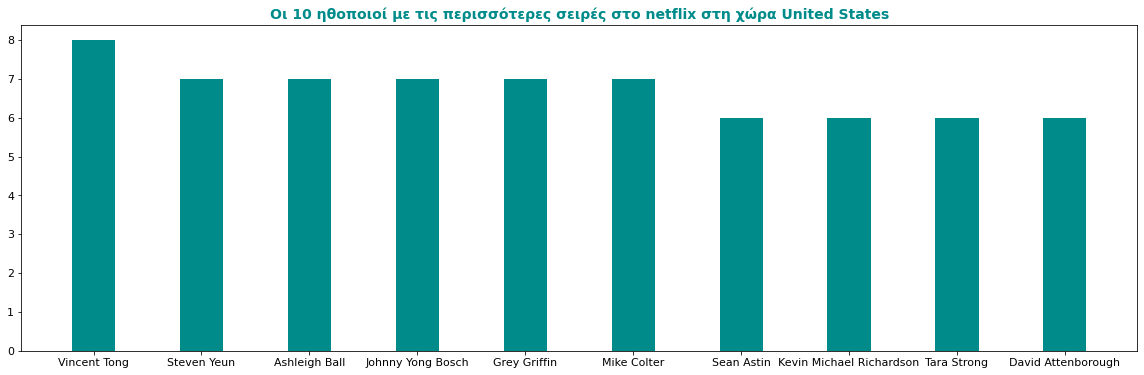

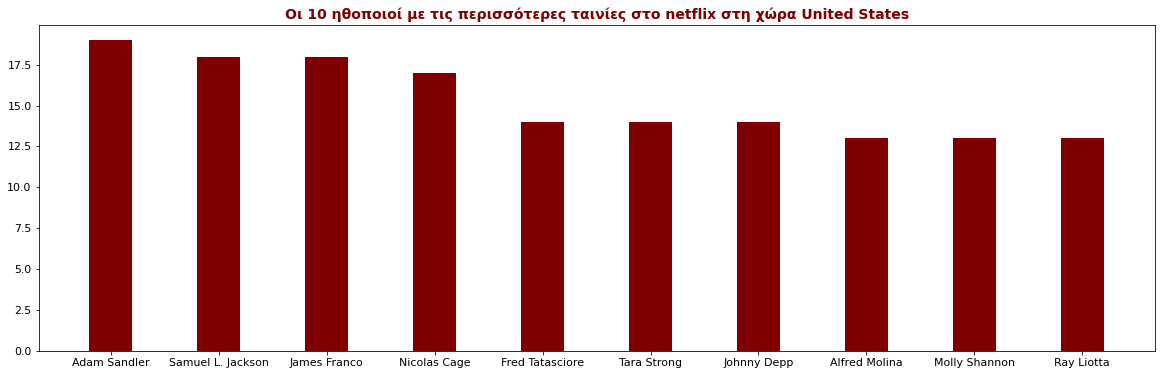

In [45]:
# Check for missing data in the columns of interest
res = missingData(['type','cast','country'], titles_df)

# If there is missing data
if res.empty == False:
  temp_titles_df = deleteMissingData(['type','cast','country'], titles_df)
else:
  temp_titles_df = titles_df

# By default, the results will be for the top 10 actors in the United States
country = 'United States'
top_actors = 10


################################################################################
#
# Αν επιθυμείτε να δείτε αποτελέσματα για άλλη χώρα από την Αμερική,
# ενημερώστε την παρακάτω μεταβλητή και αποσχολιάστε την αντίστοιχη γραμμή:
#
# country = ''
#
# -----------------------------------------------------------------------------
#
# Αν επιθυμείτε να δείτε αποτελέσματα για πάνω ή κάτω από 10 ηθοποιούς,
# ενημερώστε την παρακάτω μεταβλητή και αποσχολιάστε την αντίστοιχη γραμμή:
#
# top_actors =
#
################################################################################


# Get all types & casts for the given country
types = list()
casts = list()
# For each group of countries a production took place in
for i,countries in enumerate(temp_titles_df['country'].values):
  # If the given country is one of those countries
  if countries.find(country) != -1:
    types.append(pd.Series(data=temp_titles_df['type'].values[i], dtype='object'))
    casts.append(temp_titles_df['cast'].values[i])

# Zip data to pass them to analyse_groupped_data()
groupped = list(zip(casts, types))

# Get a dictionary for the actors and the number of tv shows each has played in, for the given country
tvshows_per_actor = analyse_groupped_data(groupped, split_key=True, num_values=True, data_filter=['TV Show'])
# Get a dictionary for the actors and the number of movies each has played in, for the given country
movies_per_actor = analyse_groupped_data(groupped, split_key=True, num_values=True, data_filter=['Movie'])

# Sort both dictionaries in descending order, based on the number of productions each actor has participated in
tvshows_per_actor = dict(sorted(tvshows_per_actor.items(), key=lambda item: item[1], reverse=True))
movies_per_actor = dict(sorted(movies_per_actor.items(), key=lambda item: item[1], reverse=True))

# Create plot for actors with the most tv shows
fig = plt.figure(figsize=(20,6))
x = list(tvshows_per_actor.keys())[:top_actors]
y = list(tvshows_per_actor.values())[:top_actors]
plt.bar(x, y, width=0.4, color='darkcyan')
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
title = 'Οι {} ηθοποιοί με τις περισσότερες σειρές στο netflix στη χώρα {}'.format(top_actors, country)
plt.title(title, fontsize=14, fontweight='bold', color='darkcyan')
print('\n')
plt.show()
print('\n')

# Create plot for actors with the most tv movies
fig = plt.figure(figsize=(20,6))
x = list(movies_per_actor.keys())[:top_actors]
y = list(movies_per_actor.values())[:top_actors]
plt.bar(x, y, width=0.4, color=['maroon'])
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
title = 'Οι {} ηθοποιοί με τις περισσότερες ταινίες στο netflix στη χώρα {}'.format(top_actors, country)
plt.title(title, fontsize=14, fontweight='bold', color='maroon')
plt.show()


###6. Το netflix υποστηρίζει ότι παρέχει πλούσιο περιεχόμενο για όλες τις ηλικίες. Αληθεύει αυτό; Φτιάξτε ένα γράφημα το οποίο συγκεντρώνει το πλήθος των ταινιών ανάλογα με την προτεινόμενη ηλικία (αναφερόμαστε στη στήλη rating). Τα όρια καθορίζονται σύμφωνα με τον πίνακα που δίνεται στην εκφώνηση. Κάντε το ίδιο γράφημα και για τις σειρές.

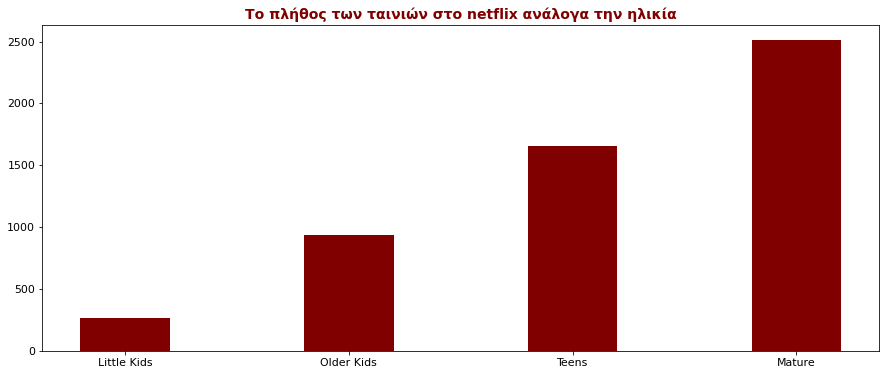

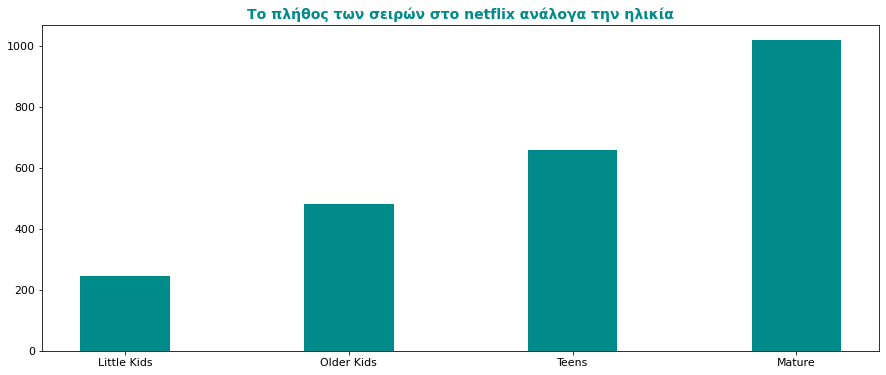

In [46]:

# Check for missing data in the columns of interest
res = missingData(['type','rating'], titles_df)

# If there is missing data
if res.empty == False:
  temp_titles_df = deleteMissingData(['type','rating'], titles_df)
else:
  temp_titles_df = titles_df

# dictionaries for each age level
movies_dict = {
    "Little Kids": 0 ,
    "Older Kids": 0 ,
    "Teens": 0 ,
    "Mature": 0
}

tvshows_dict = {
    "Little Kids": 0 ,
    "Older Kids": 0 ,
    "Teens": 0 ,
    "Mature": 0 ,   
}

# Get a list of all types in titles_df groupped by the rating by netflix users
groupped = list(temp_titles_df.groupby(temp_titles_df.rating)['type'])

# Get a dictionary of the number of movies in titles_df
movies_per_rating = analyse_groupped_data(groupped, num_values=True, data_filter=['Movie'])

# fill in age dictionary for movies
for i in movies_per_rating.keys():
  if i == 'G' or i == 'TV-Y' or i == 'TV-G':
    movies_dict["Little Kids"] += movies_per_rating[i]
  elif i == 'PG-13' or i == 'TV-14':
    movies_dict["Teens"] += movies_per_rating[i]
  elif i == 'R' or i == 'NC-17' or i == 'TV-MA':
    movies_dict["Mature"] += movies_per_rating[i]
  else:
    movies_dict["Older Kids"] += movies_per_rating[i]

# Get a dictionary of the number of tv shows in titles_df
tvshows_per_rating = analyse_groupped_data(groupped, num_values=True, data_filter=['TV Show'])

# Fill in age dictionary for tvshows
for i in tvshows_per_rating.keys():
  if i == 'G' or i == 'TV-Y' or i == 'TV-G':
    tvshows_dict["Little Kids"] += tvshows_per_rating[i]
  elif i == 'PG-13' or i == 'TV-14':
    tvshows_dict["Teens"] += tvshows_per_rating[i]
  elif i == 'R' or i == 'NC-17' or i == 'TV-MA':
    tvshows_dict["Mature"] += tvshows_per_rating[i]
  else:
    tvshows_dict["Older Kids"] += tvshows_per_rating[i]

# Plot for ratings of movies
fig = plt.figure(figsize=(15,6))
x = list(movies_dict.keys())
y = list(movies_dict.values())
plt.bar(x, y, width=0.4, color=['maroon'])
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
title = 'Το πλήθος των ταινιών στο netflix ανάλογα την ηλικία'
plt.title(title, fontsize=14, fontweight='bold', color='maroon')
plt.show()

# Plot for ratings of series
fig = plt.figure(figsize=(15,6))
x = list(tvshows_dict.keys())
y = list(tvshows_dict.values())
plt.bar(x, y, width=0.4, color='darkcyan')
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
title = 'Το πλήθος των σειρών στο netflix ανάλογα την ηλικία'
plt.title(title, fontsize=14, fontweight='bold', color='darkcyan')
print('\n')
plt.show()
print('\n')

###7. Αν ένας παραγωγός ήθελε να έχει υψηλή ακροαματικότητα,  σκέφτεται ότι θα ήταν ίσως καλύτερα να βγάλει την ταινία του σε μία εποχή που δεν υπάρχει ανταγωνισμός. Κάντε ένα γράφημα με το περιεχόμενο που προστίθεται ανά μήνα για να τον βοηθήσετε να επιλέξει τη σωστή χρονική περίοδο.

#####Παρουσιάζεται ο αριθμός των ταινιών (και μόνο) που έχουν προστεθεί ανά μήνα στο netflix.

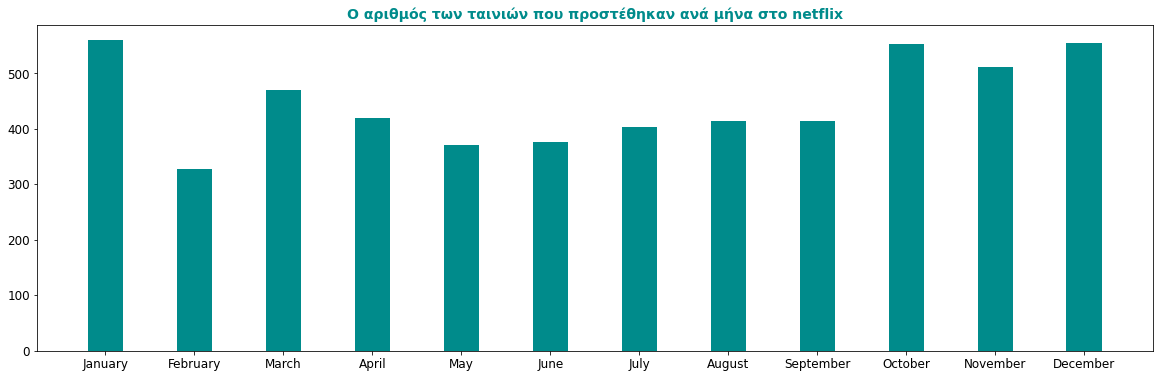

In [47]:
# Check for missing data in the columns of interest
res = missingData(['date_added','type'], titles_df)

# If there is missing data
if res.empty == False:
  temp_titles_df = deleteMissingData(['date_added','type'], titles_df)
else:
  temp_titles_df = titles_df

# Get a list of all types in titles_df groupped by the month they were added to netflix
groupped = list(temp_titles_df.groupby(temp_titles_df.date_added.dt.month)['type'])

# Replace numbers with months in 'groupped' list
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
for i in range(len(groupped)):
  show_ids = groupped[i][1]
  groupped[i] = (months[i], show_ids)

# Get a dictionary with the number of all movies for each month
per_month = analyse_groupped_data(groupped, num_values=True, data_filter=['Movie'])

# Print results
fig = plt.figure(figsize=(20,6))
x = list(per_month.keys())
y = list(per_month.values())
plt.bar(x, y, width=0.4, color=['darkcyan'])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
title = 'Ο αριθμός των ταινιών που προστέθηκαν ανά μήνα στο netflix'
plt.title(title, fontsize=14, fontweight='bold', color='darkcyan')
plt.show()

###8. Ετοιμάστε ένα γράφημα που παρουσιάζει συγκεντρωτικά τα είδη του περιεχομένου (αναφερόμαστε στη στήλη listed_in).

#####Λόγω του υπερβολικά μεγάλου όγκου αποτελεσμάτων και για οπτικούς λόγους, παρουσιάζονται τα 10 είδη ταινιών με τις περισσότερες ταινίες στο netflix και χωριστά τα 10 αντίστοιχα είδη σειρών.

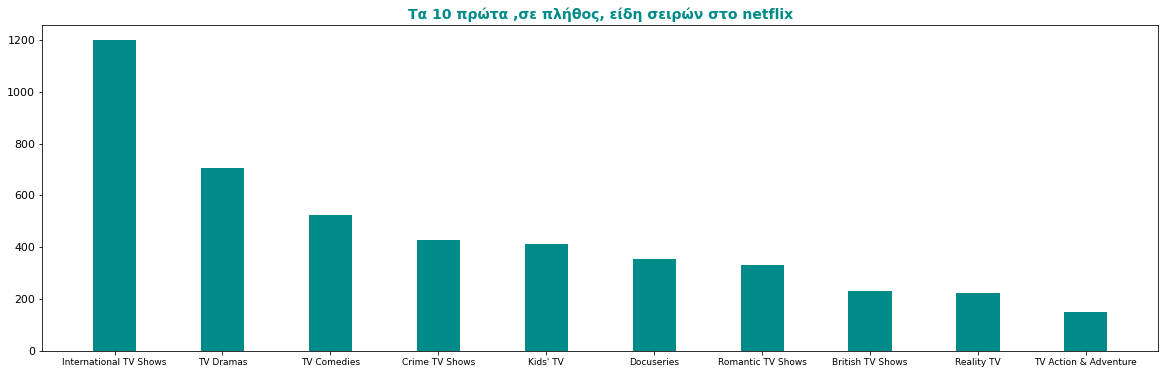

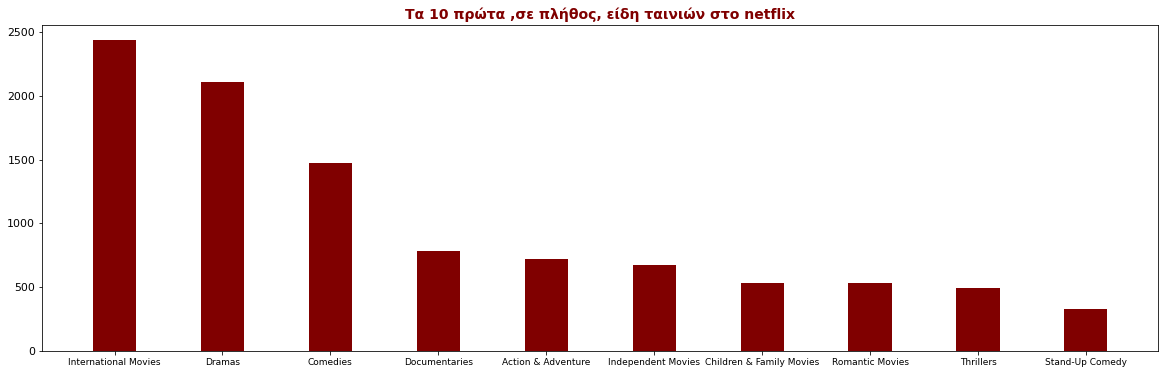

In [48]:
# Check for missing data in the columns of interest
res = missingData(['type','listed_in'], titles_df)

# If there is missing data
if res.empty == False:
  temp_titles_df = deleteMissingData(['type','listed_in'], titles_df)
else:
  temp_titles_df = titles_df

# Get a list of all types in titles_df groupped by listed_in by netflix users
groupped = list(temp_titles_df.groupby(temp_titles_df.listed_in)['type'])

# Get a dictionary of the number of movies in titles_df
movies_per_genre = analyse_groupped_data(groupped, split_key=True, num_values=True, data_filter=['Movie'])

# Get a dictionary of the number of tv shows in titles_df
tvshows_per_genre = analyse_groupped_data(groupped, split_key=True, num_values=True, data_filter=['TV Show'])

# Sort both dictionaries in descending order, based on the number of productions of each genre
tvshows_per_genre = dict(sorted(tvshows_per_genre.items(), key=lambda item: item[1], reverse=True))
movies_per_genre = dict(sorted(movies_per_genre.items(), key=lambda item: item[1], reverse=True))

# Create plot for 10 most genres with the biggest amount of tv shows
fig = plt.figure(figsize=(20,6))
x = list(tvshows_per_genre.keys())[:10]
y = list(tvshows_per_genre.values())[:10]
plt.bar(x, y, width=0.4, color='darkcyan')
plt.xticks(fontsize=9)
plt.yticks(fontsize=11)
title = 'Τα 10 πρώτα ,σε πλήθος, είδη σειρών στο netflix'
plt.title(title, fontsize=14, fontweight='bold', color='darkcyan')
print('\n')
plt.show()
print('\n')

# Create plot for 10 most genres with the biggest amount of movies
fig = plt.figure(figsize=(20,6))
x = list(movies_per_genre.keys())[:10]
y = list(movies_per_genre.values())[:10]
plt.bar(x, y, width=0.4, color=['maroon'])
plt.xticks(fontsize=9)
plt.yticks(fontsize=11)
title = 'Τα 10 πρώτα ,σε πλήθος, είδη ταινιών στο netflix'
plt.title(title, fontsize=14, fontweight='bold', color='maroon')
plt.show()

###9. Μελετήστε τους σκηνοθέτες ανά χώρα και παρουσιάστε σχετικά γραφήματα.

#####Στο πρώτο γράφημα παρουσιάζονται οι 10 χώρες με τους περισσότερους σκηνοθέτες ταινιών ή/και σειρών στο netflix.

Στο δεύτερο γράφημα παρουσιάζονται σε υποδιαγράμματα οι 5 σκηνοθέτες με τις περισσότερες ταινίες ή/και σειρές σε κάθε μια από τις χώρες του πρώτου γραφήματος.

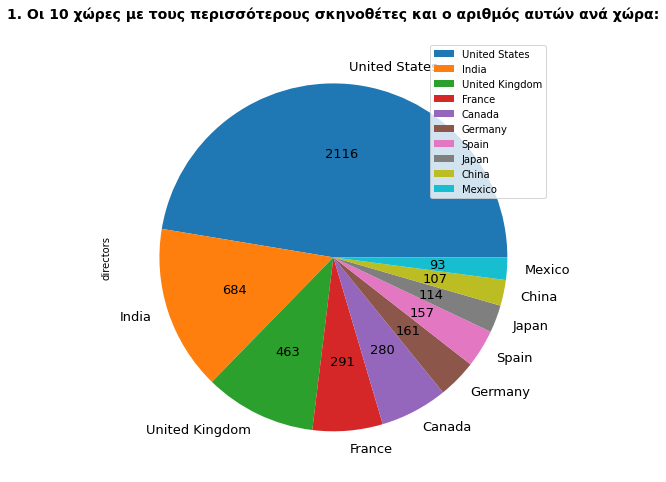


2. Για κάθε μια απ' τις παραπάνω χώρες, οι 5 σκηνοθέτες με τις περισσότερες ταινίες και σειρές στη χώρα αυτή
καθώς και ο αριθμός αυτών των ταινιών ή σειρών:




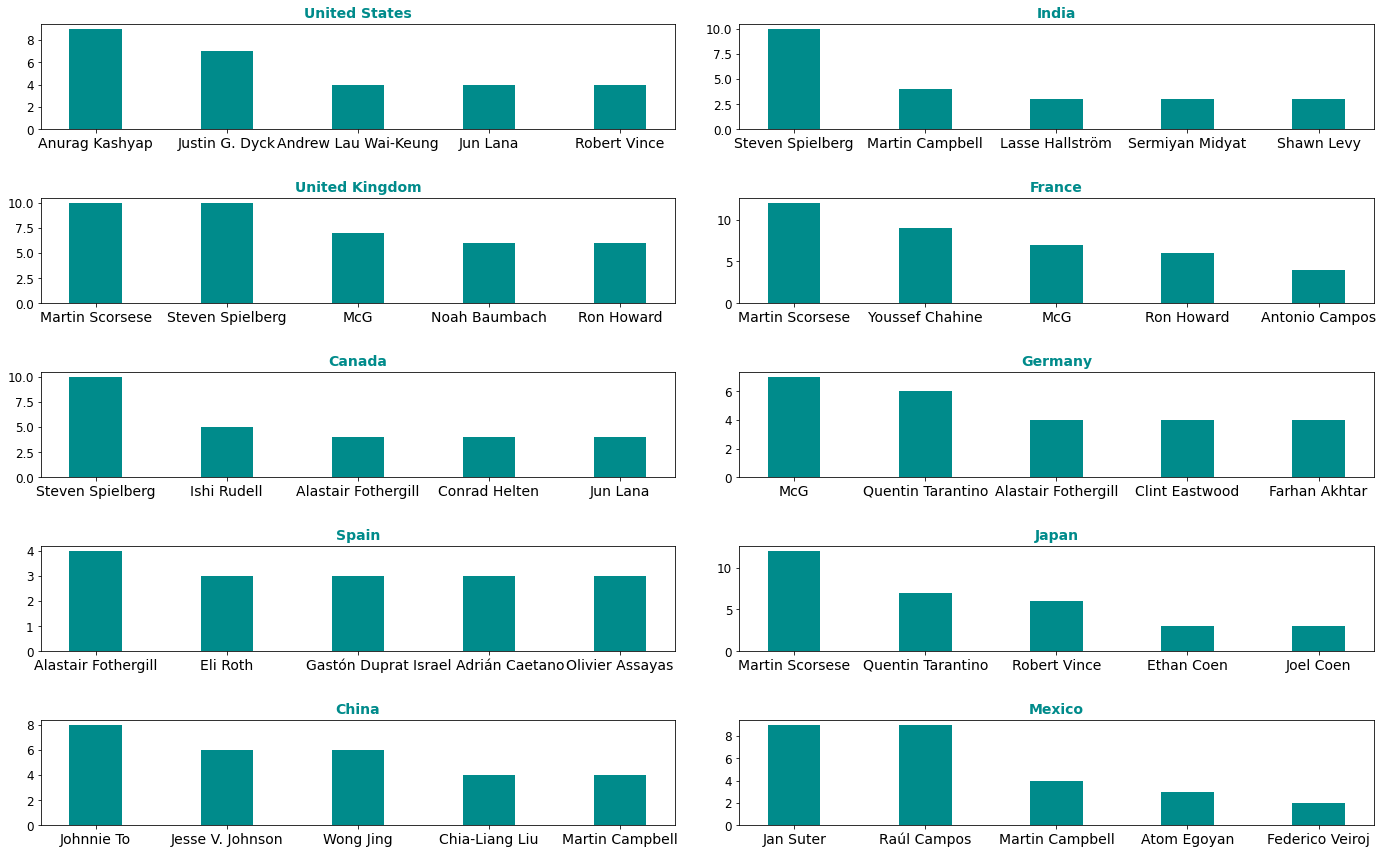

In [49]:
# Check for missing data in the columns of interest
res = missingData(['director','country'], titles_df)

# If there is missing data
if res.empty == False:
  temp_titles_df = deleteMissingData(['director','country'], titles_df)
else:
  temp_titles_df = titles_df

# Get a list of all directors groupped by the country of the production
groupped = list(temp_titles_df.groupby(temp_titles_df['country'])['director'])

# Get a dictionary with the directors with productions in each country
per_country = analyse_groupped_data(groupped, split_data=True, split_key=True, sort_values=True)

# Get dictionary woth countries sorted by the number of directors in descending order
directors_per_country = dict(sorted(per_country.items(), key=lambda item: len(item[1]), reverse=True))


# --------------------------------------------------------------------------
# 1. Print plot with the top 10 countries based on their number of directors
# --------------------------------------------------------------------------

# Keep the top 10
x = list(directors_per_country.keys())[:10]
y = list(directors_per_country.values())[:10]

df = pd.DataFrame(data={'directors':[len(i) for i in y]},index=x)
# Will display on the plot pie the numbers of directors
index = [-1]
def absolute_values(val):
  index[0] += 1
  k = index[0]
  return [len(i) for i in y][k]

# Plot of the number of directors in the top 10 countries
title = '1. Οι 10 χώρες με τους περισσότερους σκηνοθέτες και ο αριθμός αυτών ανά χώρα:\n'
df.plot.pie(y='directors', figsize=(8,8), fontsize=13, autopct=absolute_values)
plt.title(title, fontsize=14, fontweight='bold')
plt.show()


# --------------------------------------------------------------------------------------
# 2. Print plots with the top 10 directors for each of the top 10 countries (from above)
# --------------------------------------------------------------------------------------

# Keep the top ten countries from previous plot
countries = x

# Get a list of all show_ids groupped by the directors of a production
groupped = list(temp_titles_df.groupby(temp_titles_df['director'])['show_id'])

# Get a dictionary of all the tv shows/movies each director has participated in
per_director = analyse_groupped_data(groupped, split_key=True)

# Will keep a nested directory: for each country, for each of the country's directors, store the ids of their tv shows/movies
per_all = dict()
# For each of the top 10 countries
for country in countries:
  # For each director in the current country
  for director in directors_per_country[country]:
    # For each tv show/movie the current director has directed
    for id in per_director[director]:
      # The countries the current tv show/movie was produced in
      [prod_country] = temp_titles_df['country'][temp_titles_df['show_id'] == id].to_list()
      # If the current tv show/movie was produced in the current country
      if prod_country.find(country):
        if country not in per_all.keys():
          per_all[country] = dict()
          per_all[country][director] = 1
        elif director not in per_all[country].keys():
          per_all[country][director] = 1
        else:
          per_all[country][director] += 1

# For each country, sort their directors by the number of productions they've directed, in descending order
for (country,dictionary) in per_all.items():
  per_all[country] = dict(sorted(dictionary.items(), key=lambda item: item[1], reverse=True))

# Print the plots
print('\033[1m'+'\n2. Για κάθε μια απ\' τις παραπάνω χώρες, οι 5 σκηνοθέτες με τις περισσότερες ταινίες και σειρές στη χώρα αυτή\nκαθώς και ο αριθμός αυτών των ταινιών ή σειρών:\n\n'+'\033[0m')
fig = plt.figure(figsize=(20,12.5))
for i, country in enumerate(countries):
  x = list(per_all[country].keys())[:5]
  y = list(per_all[country].values())[:5]
  ax = plt.subplot(5,2,i+1)
  plt.xticks(fontsize=14)
  plt.yticks(fontsize=12)
  plt.bar(x, y, width=0.4, color='darkcyan')
  plt.title('{}'.format(country), fontsize=14, color='darkcyan', fontweight='bold')

plt.tight_layout(pad=3.0)
plt.show()

###10. Μελετήστε τις σειρές και παρουσιάστε ένα γράφημα που τις δείχνει ανάλογα με τον αριθμό των seasons.

#####Παρουσιάζεται ο αριθμός των σειρών ανάλογα με τον αριθμό των seasons τους (για οπτικούς λόγους οι κατηγορίες από 6 seasons και πάνω ομαδοποιούνται).

Ακολουθεί γράφημα με αναλυτικότερη παρουσιάση όλων των υπάρχοντων seasons και του αριθμού των σειρών τους.

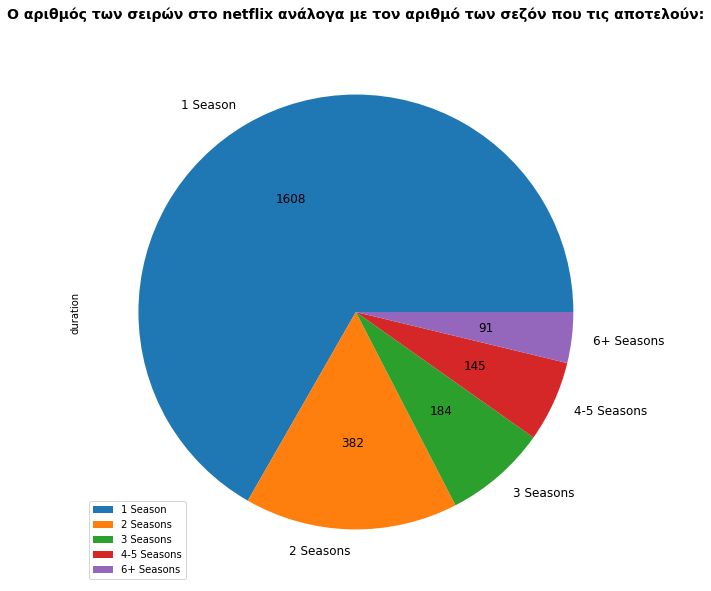

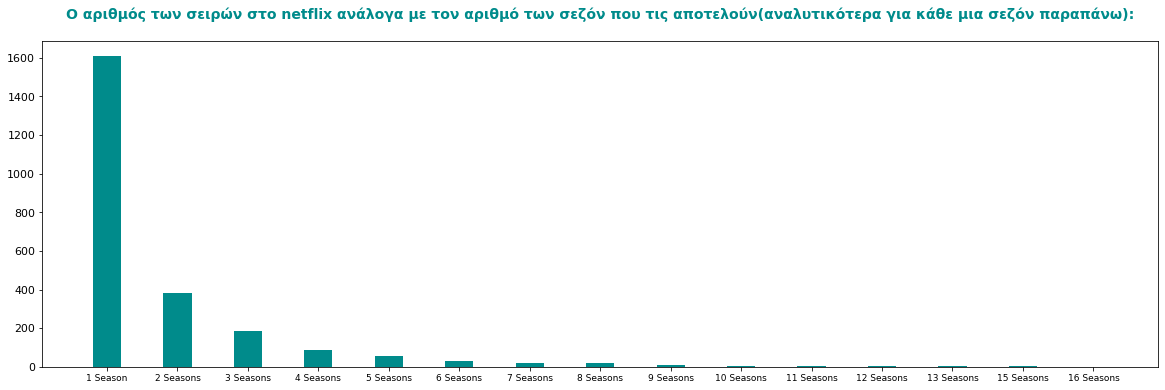

In [50]:
# Check for missing data in the columns of interest
res = missingData(['type','duration'], titles_df)

# If there is missing data
if res.empty == False:
  temp_titles_df = deleteMissingData(['type','listed_in'], titles_df)
else:
  temp_titles_df = titles_df

# Create dictionary for seasons of tv shows
seasons_dict = {
     "1 Season": 0 ,
     "2 Seasons": 0 ,
     "3 Seasons": 0 ,
     "4-5 Seasons": 0,
     "6+ Seasons": 0  
 }

# Get a list of all types in titles_df groupped by duration by netflix users
groupped = list(temp_titles_df.groupby(temp_titles_df.duration)['type'])

seasons = ['1 Season','2 Seasons','3 Seasons','4 Seasons','5 Seasons','6 Seasons','7 Seasons','8 Seasons','9 Seasons','10 Seasons','11 Seasons','12 Seasons','13 Seasons','14 Seasons','15 Seasons','16 Seasons']

# Get a dictionary of the number of tv shows per season in titles_df
tvshows_per_duration = analyse_groupped_data(groupped, num_values=True, key_filter=seasons, data_filter=['TV Show'])

# Sort the dictionary by the number of tv shows in descending order
tvshows_per_duration = dict(sorted(tvshows_per_duration.items(), key=lambda item: item[1], reverse=True))

# Fill in seasons categories dictionary for tv shows
for i in tvshows_per_duration.keys():
  if i == '1 Season':
    seasons_dict["1 Season"] += tvshows_per_duration[i]
  elif i == '2 Seasons':
    seasons_dict["2 Seasons"] += tvshows_per_duration[i]
  elif i == '3 Seasons':
    seasons_dict["3 Seasons"] += tvshows_per_duration[i]
  elif i == '4 Seasons' or i == '5 Seasons':
     seasons_dict["4-5 Seasons"] += tvshows_per_duration[i]
  else:
    seasons_dict["6+ Seasons"] += tvshows_per_duration[i]

# Create plot pie for duration of tv shows
x = list(seasons_dict.keys())
y = list(seasons_dict.values())

df = pd.DataFrame(data={'duration':[i for i in y]},index=x)
# Will display on the plot pie the numbers of tv shows
index = [-1]
def absolute_values(val):
  index[0] += 1
  k = index[0]
  return [i for i in y][k]

# Duration of tv shows
title = 'Ο αριθμός των σειρών στο netflix ανάλογα με τον αριθμό των σεζόν που τις αποτελούν:\n'
df.plot.pie(y='duration', figsize=(10,10), fontsize=12, autopct=absolute_values)
plt.title(title, fontsize=14, fontweight='bold')
plt.show()

# More analytic plot of the pie plot
fig = plt.figure(figsize=(20,6))
x = list(tvshows_per_duration.keys())
y = list(tvshows_per_duration.values())
plt.bar(x, y, width=0.4, color='darkcyan')
plt.xticks(fontsize=9)
plt.yticks(fontsize=11)
title = 'Ο αριθμός των σειρών στο netflix ανάλογα με τον αριθμό των σεζόν που τις αποτελούν(αναλυτικότερα για κάθε μια σεζόν παραπάνω):\n'
plt.title(title, fontsize=14, fontweight='bold', color='darkcyan')
print('\n')
plt.show()

###11. Αξιοποιήστε τα υπόλοιπα αρχεία της εργασίας για να απαντήσετε στο ερώτημα: Ποιές είναι οι ταινίες με την πιο υψηλή βαθμολογία; Θα χρειαστεί να συννενώσετε κατάλληλα τα αρχεία που σας δίνονται ώστε να κρατήσετε τις ταινίες του netflix για τις οποίες υπάρχουν ratings στο IMBD.

#####Η σύγκριση των βαθμολογιών μεταξύ των ταινιών βασίζεται στη στήλη weighted_average_votes του 'IMDb ratings.csv'. Παρατηρήθηκε όμως ότι η στήλη αυτή υπάρχει και στο αρχείο 'IMBd movies.csv' με το όνομα avg_vote, κι επομένως για λόγους ευκολίας χρησιμοποιήθηκε η στήλη από το 'IMDb movies.csv' αρχείο.

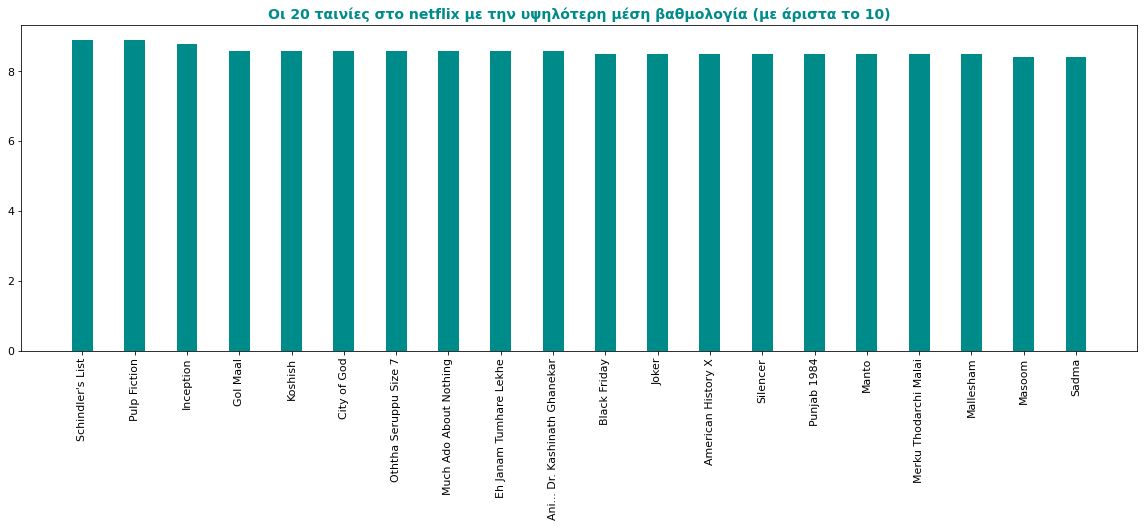

In [51]:
# Check for missing data in the columns of interest
netflix_res = missingData(['type', 'title'], titles_df)
imdb_res = missingData(['title', 'avg_vote'], movies_df)

# If there is missing data
if netflix_res.empty == False:
  temp_titles_df = deleteMissingData(['type','title'], titles_df)
else:
  temp_titles_df = titles_df
# If there is missing data
if imdb_res.empty == False:
  temp_imdb_df = deleteMissingData(['title','avg_vote'], movies_df)
else:
  temp_imdb_df = movies_df

# Get the titles of all movies in netflix
netflix_titles = temp_titles_df['title'][temp_titles_df['type'] == 'Movie'].to_list()

# Get the titles of all movies in imdb
imdb_titles = temp_imdb_df['title'].to_list()

# Get the weighted average votes of all movies in imdb
imdb_votes = temp_imdb_df['avg_vote'].to_list()

# Convert list of floats to list of pd.Series to pass it to analyse_groupped_data()
imdb_votes = [pd.Series(data=vote,dtype='float64') for vote in imdb_votes]

# Zip data to pass them to analyse_groupped_data()
groupped = list(zip(imdb_titles, imdb_votes))

# Get a dictionary for the actors and the number of tv shows each has played in, for the given country
per_title = analyse_groupped_data(groupped, key_filter=netflix_titles)

# In the case of some keys in the dictionary having multiple ratings (because of duplicate titles)
# Expand the list of the titles so that each rating will be considered as one for a different movie
titles = []
rating = []
for (key, values) in per_title.items():
  title = [key]*len(values)
  titles = titles + title
  rating = rating + values

# Sort titles & rating in descending order of the all ratings
titles, rating = zip(*sorted(zip(titles,rating), key=lambda item: item[1], reverse=True))

# Create plot for movies with the greatest rating
fig = plt.figure(figsize=(20,6))
x = titles[:20]
y = rating[:20]
plt.bar(x, y, width=0.4, color='darkcyan')
plt.xticks(fontsize=11, rotation=90)
plt.yticks(fontsize=11)
title = 'Οι 20 ταινίες στο netflix με την υψηλότερη μέση βαθμολογία (με άριστα το 10)'
plt.title(title, fontsize=14, fontweight='bold', color='darkcyan')
print('\n')
plt.show()

---
#Recommendation System

In [52]:
# Import the needed libraries

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import cosine_similarity


###1. a.  Αναπαράσταση του περιεχομένου του netflix με τη μορφή ενός boolean BoW πίνακα.

#####Το σύνολο των λέξεων που θα χρησιμοποιηθούν για το BoW προέρχεται από το concatenation του τίτλου κάθε ταινίας/σειράς με την περιγραφή της.

#####Παράμετροι του CountVectorizer:
> Θέτοντας min_df=2 κρατάμε μόνο τις λέξεις που εμφανίζονται τουλάχιστον 2 φορές στα κείμενα και απορρίπτουμε μεγάλο αριθμό λέξεων που εμφανίζονται μόνο 1 φορά και πιθανώς να μην είναι τόσο σημαντικές για το γενικό νόημα.

> Θέτοντας ngram_range=(1,2) ζητάμε οι στήλες του BoW πίνακα να αποτελούνται από unigrams & bigrams.

> Θέλουμε να κατασκευάσουμε boolean BoW, επομένως επιλέγουμε και την παράμετρο dtype=bool

In [53]:
# Check for missing data in the columns of interest
res = missingData(['show_id','title','description'], titles_df)

# If there is missing data
if res.empty == False:
  temp_titles_df = deleteMissingData(['show_id','title','description'], titles_df)
else:
  temp_titles_df = titles_df

# Get list of all titles in netflix
titles = temp_titles_df['title'].to_list()
# Get list of all descriptions in netflix
descriptions = temp_titles_df['description'].to_list()
# Combine each title with its description, to pass them in bow as one row
input = [title + ' ' + descriptions[i] for i, title in enumerate(titles)]

# Create a bow vectorizer with the appropriate params
bow_vectorizer = CountVectorizer(ngram_range=(1,2), dtype=bool, stop_words='english', min_df=2)
# bow_vectorizer = CountVectorizer(ngram_range=(1,2), dtype=bool, stop_words=stopwords, min_df=2)

# Get a bow representation of all movies & tv shows in netflix
bow_xtrain = bow_vectorizer.fit_transform(input)

# Get the BoW array
bow = bow_xtrain.toarray()

(rows, cols) = bow_xtrain.shape
print('Αριθμός γραμμών (τίτλων ταινιών & σειρών) στο BoW: {}\nΑριθμός στηλών (λέξεων) στο BoW: {}\n'.format(rows,cols))

Αριθμός γραμμών (τίτλων ταινιών & σειρών) στο BoW: 7787
Αριθμός στηλών (λέξεων) στο BoW: 17370



###1. b. Αναπαράσταση του περιεχομένου του netflix με τη μορφή ενός TF-IDF πίνακα.

#####Το σύνολο των λέξεων που θα χρησιμοποιηθούν για τον TF-IDF πίνακα προέρχεται από το concatenation του τίτλου κάθε ταινίας/σειράς με την περιγραφή της.

#####Παράμετροι του TfidfVectorizer:
> Θέτοντας min_df=2 κρατάμε μόνο τις λέξεις που εμφανίζονται τουλάχιστον 2 φορές στα κείμενα και απορρίπτουμε μεγάλο αριθμό λέξεων που εμφανίζονται μόνο 1 φορά και πιθανώς να μην είναι τόσο σημαντικές για το γενικό νόημα.

> Θέτοντας ngram_range=(1,2) ζητάμε οι στήλες του TF-IDF πίνακα να αποτελούνται από unigrams & bigrams.

In [54]:
# Check for missing data in the columns of interest
res = missingData(['show_id','title','description'], titles_df)

# If there is missing data
if res.empty == False:
  temp_titles_df = deleteMissingData(['show_id','title','description'], titles_df)
else:
  temp_titles_df = titles_df

# Get list of all titles in netflix
titles = temp_titles_df['title'].to_list()
# Get list of all descriptions in netflix
descriptions = temp_titles_df['description'].to_list()
# Combine each title with its description, to pass them in TF-IDF as one row
input = [title + ' ' + descriptions[i] for i, title in enumerate(titles)]

# Create a TF-IDF vectorizer with the appropriate params
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2), stop_words='english', min_df=2)

# Get a TF-IDF representation of all movies & tv shows in netflix
tfidf = tfidf_vectorizer.fit_transform(input)

# Get the TF-IDF array
tfidf_arr = tfidf.toarray()

(rows, cols) = tfidf.shape
print('Αριθμός γραμμών (τίτλων ταινιών & σειρών) στο TF-IDF: {}\nΑριθμός στηλών (λέξεων) στο TF-IDF: {}\n'.format(rows,cols))

Αριθμός γραμμών (τίτλων ταινιών & σειρών) στο TF-IDF: 7787
Αριθμός στηλών (λέξεων) στο TF-IDF: 17370



###2. a. Υπολογισμός ομοιότητας ανά δύο ταινιών/σειρών για όλο το περιεχόμενο του netflix με χρήση του BoW πίνακα.

#####Για να εξεταστούν σε ικανοποιητικό χρόνο όλα τα δυνατά ζεύγη, χρησιμοποιείται η sklearn.metrics.pairwise_distances με επιλογή την αξιοποίηση του Jaccard coefficient.

Στο τέλος εκτυπώνονται ενδεικτικά τα πρώτα αντικείμενα του python dictionary που δημιουργείται.

(χρόνος εκτέλεσης περίπου 15')

In [55]:
# Get similarities between any per of movies/tv shows using the Jaccard similarity coefficient score
res = 1 - pairwise_distances(bow, metric='jaccard')

# Will create a dict of all similarities per movie/tv show
# { movie title 1: [ (movie title 2, similarity), .. ] }
bow_similarities = dict()

# For each movie/tv show title
for i, title_i in enumerate(titles):
  # Get a list of tuples, where each tuple is (other title, similarity with the key title)
  bow_similarities[title_i] = [(title_j, res[i][j]) for j, title_j in enumerate(titles) if i != j]
  # Sort current title's similarities to other titles in descending order
  bow_similarities[title_i] = sorted(bow_similarities[title_i], key=lambda element: element[1], reverse=True)
  # Keep the 100 titles with the greatest similarity to the key title
  bow_similarities[title_i] = bow_similarities[title_i][:100]


print('\033[1m Ενδεικτικά οι 3 πιο όμοιες ταινίες/σειρές για τα 5 πρώτα κλειδιά του dictionary:\n \033[0m')
for i in range(5):
  print('\n{}:\n'.format(list(bow_similarities.keys())[i]))
  for j in range(3):
    print('\t{} (κατά {}%)\n'.format(list(bow_similarities.values())[i][j][0], int((list(bow_similarities.values())[i][j][1])*100)))

 Ενδεικτικά οι 3 πιο όμοιες ταινίες/σειρές για τα 5 πρώτα κλειδιά του dictionary:
 

3%:

	Stoked (κατά 8%)

	Mossad 101 (κατά 7%)

	My Schoolmate, the Barbarian (κατά 7%)


7:19:

	Rezeta (κατά 12%)

	Term Life (κατά 11%)

	Pandora (κατά 11%)


23:59:

	Camp X-Ray (κατά 12%)

	Pizza (κατά 9%)

	Snowden (κατά 9%)


9:

	Suckseed (κατά 12%)

	Railroad Tigers (κατά 9%)

	Huntik: Secrets and Seekers (κατά 8%)


21:

	Ocean's Eleven (κατά 13%)

	Beavis and Butt-head Do America (κατά 11%)

	Fear and Loathing in Las Vegas (κατά 11%)



###2. b. Υπολογισμός ομοιότητας ανά δύο ταινιών/σειρών για όλο το περιεχόμενο του netflix με χρήση του TF-IDF πίνακα.

#####Για να εξεταστούν σε ικανοποιητικό χρόνο όλα τα δυνατά ζεύγη, χρησιμοποιείται η sklearn.metrics.pairwise.cosine_similarity.

Στο τέλος εκτυπώνονται ενδεικτικά τα πρώτα αντικείμενα του python dictionary που δημιουργείται.

(χρόνος εκτέλεσης περίπου 1.5')

In [56]:
# Get similarities between any per of movies/tv shows using the cosine similarity
res = cosine_similarity(tfidf_arr)

# Will create a dict of all similarities per movie/tv show
# { movie title 1: [ (movie title 2, similarity), .. ] }
tfidf_similarities = dict()

# For each movie/tv show title
for i, title_i in enumerate(titles):
  # Get a list of tuples, where each tuple is (other title, similarity with the key title)
  tfidf_similarities[title_i] = [(title_j, res[i][j]) for j, title_j in enumerate(titles) if i != j]
  # Sort current title's similarities to other titles in descending order
  tfidf_similarities[title_i] = sorted(tfidf_similarities[title_i], key=lambda element: element[1], reverse=True)
  # Keep the 100 titles with the greatest similarity to the key title
  tfidf_similarities[title_i] = tfidf_similarities[title_i][:100]

print('\033[1m Ενδεικτικά οι 3 πιο όμοιες ταινίες/σειρές για τα 5 πρώτα κλειδιά του dictionary:\n \033[0m')
for i in range(5):
  print('\n{}:\n'.format(list(tfidf_similarities.keys())[i]))
  for j in range(3):
    print('\t{} (κατά {}%)\n'.format(list(tfidf_similarities.values())[i][j][0], int((list(tfidf_similarities.values())[i][j][1])*100)))

 Ενδεικτικά οι 3 πιο όμοιες ταινίες/σειρές για τα 5 πρώτα κλειδιά του dictionary:
 

3%:

	Fire in Paradise (κατά 17%)

	Stoked (κατά 14%)

	Lifechanger (κατά 13%)


7:19:

	Pandora (κατά 19%)

	The Darkest Dawn (κατά 19%)

	Van Helsing (κατά 19%)


23:59:

	Camp X-Ray (κατά 22%)

	Snowden (κατά 19%)

	The Decline (κατά 18%)


9:

	Suckseed (κατά 19%)

	The Doll (κατά 18%)

	The Doll 2 (κατά 18%)


21:

	Fear and Loathing in Las Vegas (κατά 31%)

	Ocean's Eleven (κατά 23%)

	Vegas Baby (κατά 23%)



###3. Συνάρτηση που βρίσκει τους Ν πιο όμοιους τίτλους σε δεδομένο τίτλο ταινίας/σειράς στο netflix με τη χρήση ενός boolean BoW πίνακα ή ενός TF-IDF πίνακα.

Από μερικές ενδεικτικές κλήσεις της συνάρτησης αυτής παρατηρούμε ότι και οι δύο μέθοδοι (boolean, tf-idf) επιστρέφουν αρκετούς ίδιους πιο όμοιους τίτλους, συνήθως σε λίγο διαφορετική σειρά. Επίσης, κατά κύριο λόγο φαίνεται τα ποσοστά ομοιότητας που υπολογίζονται από τη μέθοδο tf-idf να είναι αρκετά υψηλότερα απ' αυτά της boolean μεθόδου, που πιθανώς να σημαίνει καλύτερη ανάλυση των δεδομένων για την πρώτη μέθοδο.

In [57]:
# Get the N most similar movies/tv shows to a specific movie/tv show
def get_similar_movies1(title, N=10, method='boolean'):

  if method == 'boolean':
    # Get the first N titles that are the most similar to the given title & their number of similarity
    N_similars = [bow_similarities[title][i] for i in range(N)]
  elif method == 'tf-idf':
    # Get the first N titles that are the most similar to the given title & their number of similarity with TF-IDF method
    N_similars = [tfidf_similarities[title][i] for i in range(N)]

  else:
    print('Error with method param. Please choose either the boolean or the tf-idf method.\n')
    return None

  return N_similars

#--------------------------------
# Examples
#--------------------------------

examples = ['Black Panther','Joker','Friends','Marvel\'s Iron Fist','Between Worlds']

for title in examples:
  print('\033[1m Οι 5 πιο όμοιες ταινίες/σειρές στο {} (Μέθοδος boolean):\n \033[0m'.format(title))
  for i,similar in enumerate(get_similar_movies1(title, N=5)):
    print('\t{}. {} (κατά {}%)\n'.format(i+1, similar[0], int((similar[1])*100)))

  print('\033[1m Οι 5 πιο όμοιες ταινίες/σειρές στο {} (Μέθοδος TF-IDF):\n \033[0m'.format(title))
  for i,similar in enumerate(get_similar_movies1(title, N=5, method='tf-idf')):
    print('\t{}. {} (by {}%)\n'.format(i+1, similar[0], int((similar[1])*100)))

 Οι 5 πιο όμοιες ταινίες/σειρές στο Black Panther (Μέθοδος boolean):
 
	1. LEGO Marvel Super Heroes: Black Panther (κατά 11%)

	2. The Black Room (κατά 9%)

	3. John Henry (κατά 8%)

	4. Cake (κατά 8%)

	5. Hope Aur Hum (κατά 8%)

 Οι 5 πιο όμοιες ταινίες/σειρές στο Black Panther (Μέθοδος TF-IDF):
 
	1. LEGO Marvel Super Heroes: Black Panther (by 35%)

	2. Hope Aur Hum (by 13%)

	3. Pioneers of African-American Cinema (by 11%)

	4. John Henry (by 10%)

	5. Fugitiva (by 10%)

 Οι 5 πιο όμοιες ταινίες/σειρές στο Joker (Μέθοδος boolean):
 
	1. Shahanpan Dega Deva (κατά 14%)

	2. Vitti Dandu (κατά 14%)

	3. Cemara's Family (κατά 13%)

	4. Journey to Greenland (κατά 11%)

	5. Patron Mutlu Son Istiyor (κατά 10%)

 Οι 5 πιο όμοιες ταινίες/σειρές στο Joker (Μέθοδος TF-IDF):
 
	1. Shahanpan Dega Deva (by 30%)

	2. Cemara's Family (by 20%)

	3. Vitti Dandu (by 19%)

	4. War Chhod Na Yaar (by 18%)

	5. Pitaah (by 16%)

 Οι 5 πιο όμοιες ταινίες/σειρές στο Friends (Μέθοδος boolean):
 
	1. Fartsa (κ

###4. Συνάρτηση που βρίσκει τους Ν πιο όμοιους τίτλους σε δεδομένη περιγραφή ταινίας/σειράς στο netflix με τη χρήση ενός boolean BoW πίνακα ή ενός TF-IDF πίνακα.

Από τα τυχαία, ενδεικτικά παραδείγματα που εκτυπώνονται παρατηρούμε ότι και οι δύο μέθοδοι καταφέρνουν να βρουν με επιτυχία την ταινία/σειρά στην οποία ανήκει η εκάστοτε περιγραφή και μάλιστα με ποσοστά ομοιότητας που δεν πέφτουν κάτω από το 80%. Επίσης αξιοσημείωτο είναι ότι τα ποσοστά ομοιότητας κάθε περιγραφής με τις λιγότερο όμοιες ταινίες/σειρές που προτείνονται (δηλαδή πέραν της πρώτης προτεινόμενης) είναι αρκετά πιο χαμηλά - δεν ξεπερνούν το 25%.

Όπως και στο προηγούμενο ερώτημα, η μέθοδος tf-idf παρουσιάζει κατά μέσο όρο ελαφρώς μεγαλύτερα ποσοστά ομοιότητας από την boolean μέθοδο.

Για καμία από τις μεθόδους δεν παρατηρείται κάποια σημαντική αστοχία.


In [58]:
# Get the N most similar movies/tv shows to a given description
def get_similar_movies2(description, N=10, method='tf-idf'):

  if method == 'boolean':

    # Create BoW from the given description
    desc_vectorizer = CountVectorizer(ngram_range=(1,2), dtype=bool, stop_words='english', min_df=1, max_df=1.0)
    desc_xtrain = desc_vectorizer.fit_transform([description])
    desc_bow = desc_xtrain.toarray()

    # Keep in the description only words that also exist in general BoW of all movies/tv shows
    desc_feature_names = [word for word in desc_vectorizer.get_feature_names() if word in bow_vectorizer.get_feature_names()]

    # We want to expand description's BoW to the size of the general BoW, keeping the right boolean values for the right columns
    # For each feature name of the description, get its column number in general BoW
    indexes = [bow_vectorizer.get_feature_names().index(word) for word in desc_feature_names]

    # Create a vector by the general BoW's length, filled with False values
    desc_vector = [False]*bow.shape[1]

    # For each column number which corresponds to a word of the given description
    for i, index in enumerate(indexes):
      # Change the value of current column to True
      desc_vector[index] = True

    # Turn description's BoW to np array type, to pass it to pairwise_distances()
    desc_vector = np.array(desc_vector)
    desc_bow = np.array([desc_vector])

    # Get a vector of the similarities of the given description to each title in netflix
    res = 1 - pairwise_distances(desc_bow, bow, metric='jaccard')
    res = list(res[0])

    # Sort titles by their similarity to the description, in descending order
    similar_titles = titles
    similar_titles, res = zip(*sorted(zip(similar_titles, res), key=lambda item: item[1], reverse=True))

    # Return the N most similar titles, and their number of similarity
    return similar_titles[:N], res[:N]

  elif method == 'tf-idf':

    # Create TF-IDF from the given description
    desc_vectorizer = TfidfVectorizer(ngram_range=(1,2), stop_words='english', min_df=1, max_df=1.0)
    desc_xtrain = desc_vectorizer.fit_transform([description])
    desc_tfidf = desc_xtrain.toarray()

    # Keep in the description only words that also exist in general TF-IDF of all movies/tv shows
    desc_feature_names = [word for word in desc_vectorizer.get_feature_names() if word in tfidf_vectorizer.get_feature_names()]

    # We want to expand description's TF-IDF to the size of the general TF-IDF, keeping the right boolean values for the right columns
    # For each feature name of the description, get its column number in general TF-IDF
    indexes = [tfidf_vectorizer.get_feature_names().index(word) for word in desc_feature_names]

    # Create a vector by the general TF-IDF's length, filled with False values
    desc_vector = [False]*tfidf_arr.shape[1]

    # For each column number which corresponds to a word of the given description
    for i, index in enumerate(indexes):
      # Change the value of current column to the responsive TF-IDF value
      desc_vector[index] = desc_tfidf[0][i]         

    # Turn description's TF-IDF to np array type, to pass it to pairwise_distances()
    desc_vector = np.array(desc_vector)
    desc_tfidf = np.array([desc_vector])

    # Get a vector of the similarities of the given description to each title in netflix
    res = cosine_similarity(desc_tfidf,tfidf_arr)
    res = list(res[0])

    # Sort titles by their similarity to the description, in descending order
    similar_titles = titles
    similar_titles, res = zip(*sorted(zip(similar_titles, res), key=lambda item: item[1], reverse=True))

    # Return the N most similar titles, and their number of similarity
    return similar_titles[:N], res[:N]

  else:
    print('Error with method param. Please choose either the boolean or the tf-idf method.\n')
    return None


#--------------------------------
# Examples
#--------------------------------

# Show_ids of movies/tv shows in netflix 
ids = ['s960','s3216','s2289','s3966','s866']
for id in ids:
  # Get the description & the title of the respective movie/tv show
  desc = titles_df['description'][titles_df['show_id'] == id].to_list()[0]
  title = titles_df['title'][titles_df['show_id'] == id].to_list()[0]

  # Bow example
  similar_titles, res = get_similar_movies2(desc, N=5, method='boolean')
  print('\033[1m Οι 5 πιο όμοιες ταινίες/σειρές στο {} βάσει το πεδίο description (Μέθοδος boolean):\n \033[0m'.format(title))
  for i,similar in enumerate(similar_titles):
    print('\t{}. {}  (κατά {}%)\n'.format(i+1, similar, int((res[i])*100)))

  # TF-IDF example
  similar_titles, res = get_similar_movies2(desc, N=5, method='tf-idf')
  print('\033[1m Οι 5 πιο όμοιες ταινίες/σειρές στο {} βάσει το πεδίο description (Μέθοδος TF-IDF):\n \033[0m'.format(title))
  for i,similar in enumerate(similar_titles):
    print('\t{}. {}  (κατά {}%)\n'.format(i+1, similar, int((res[i])*100)))


 Οι 5 πιο όμοιες ταινίες/σειρές στο Black Panther βάσει το πεδίο description (Μέθοδος boolean):
 
	1. Black Panther  (κατά 83%)

	2. John Henry  (κατά 9%)

	3. Cake  (κατά 9%)

	4. Hope Aur Hum  (κατά 9%)

	5. Daughters of the Dust  (κατά 9%)

 Οι 5 πιο όμοιες ταινίες/σειρές στο Black Panther βάσει το πεδίο description (Μέθοδος TF-IDF):
 
	1. Black Panther  (κατά 87%)

	2. Hope Aur Hum  (κατά 14%)

	3. John Henry  (κατά 13%)

	4. Fugitiva  (κατά 13%)

	5. Æon Flux  (κατά 12%)

 Οι 5 πιο όμοιες ταινίες/σειρές στο Joker βάσει το πεδίο description (Μέθοδος boolean):
 
	1. Joker  (κατά 93%)

	2. Shahanpan Dega Deva  (κατά 15%)

	3. Vitti Dandu  (κατά 15%)

	4. Cemara's Family  (κατά 13%)

	5. Journey to Greenland  (κατά 11%)

 Οι 5 πιο όμοιες ταινίες/σειρές στο Joker βάσει το πεδίο description (Μέθοδος TF-IDF):
 
	1. Joker  (κατά 93%)

	2. Shahanpan Dega Deva  (κατά 30%)

	3. Cemara's Family  (κατά 24%)

	4. Vitti Dandu  (κατά 24%)

	5. Pitaah  (κατά 19%)

 Οι 5 πιο όμοιες ταινίες/σειρές σ